In [47]:
# Importing essential libraries
import pandas as pd
import numpy as np

In [48]:
# Loading the dataset
df = pd.read_csv('ipl.csv')

## **Exploring the dataset**

In [49]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [50]:
df.shape

(76014, 15)

In [51]:
df.dtypes

,0
mid,int64
date,object
venue,object
bat_team,object
bowl_team,object
batsman,object
bowler,object
runs,int64
wickets,int64
overs,float64


In [52]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


## **Data Cleaning**
Points covered under this section:<br/>
*• Removing unwanted columns*<br/>
*• Keeping only consistent teams*<br/>
*• Removing the first 5 overs data in every match*<br/>
*• Converting the column 'date' from string into datetime object*<br/>

In [53]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [54]:
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [55]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [56]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [57]:
df.index

RangeIndex(start=0, stop=76014, step=1)

In [58]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [59]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [60]:
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [61]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [62]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [63]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


# Univariate Analysis

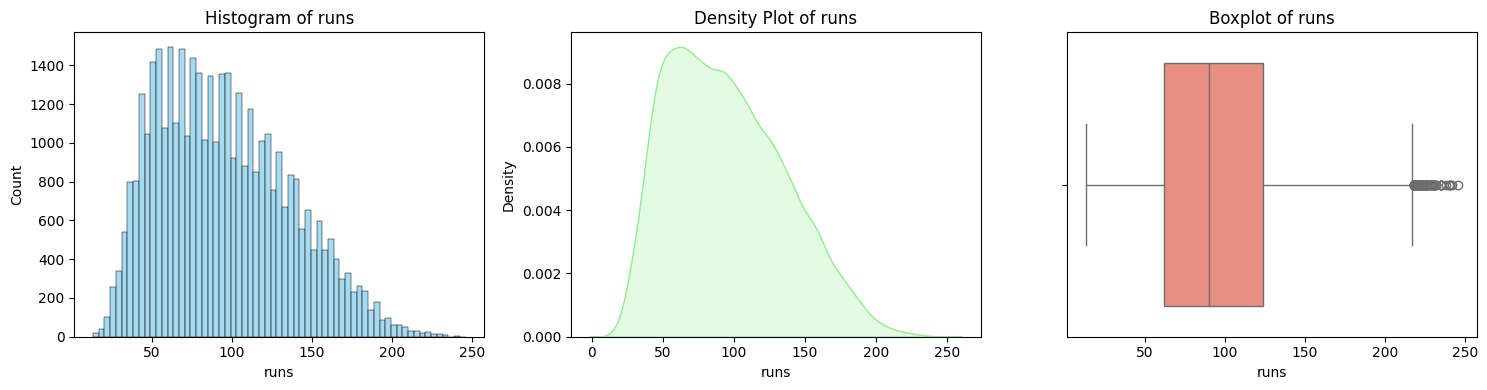

Feature: runs
count    40108.000000
mean        94.972699
std         40.966837
min         13.000000
25%         62.000000
50%         90.000000
75%        124.000000
max        246.000000
Name: runs, dtype: float64
Skewness: 0.485
Kurtosis: -0.418
------------------------------------------------------------


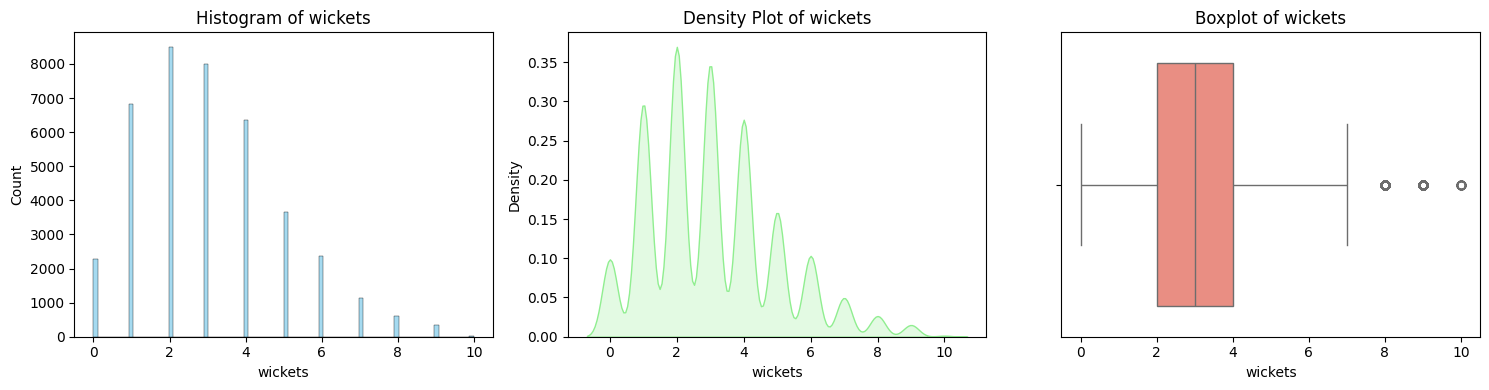

Feature: wickets
count    40108.000000
mean         3.042186
std          1.906814
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: wickets, dtype: float64
Skewness: 0.685
Kurtosis: 0.237
------------------------------------------------------------


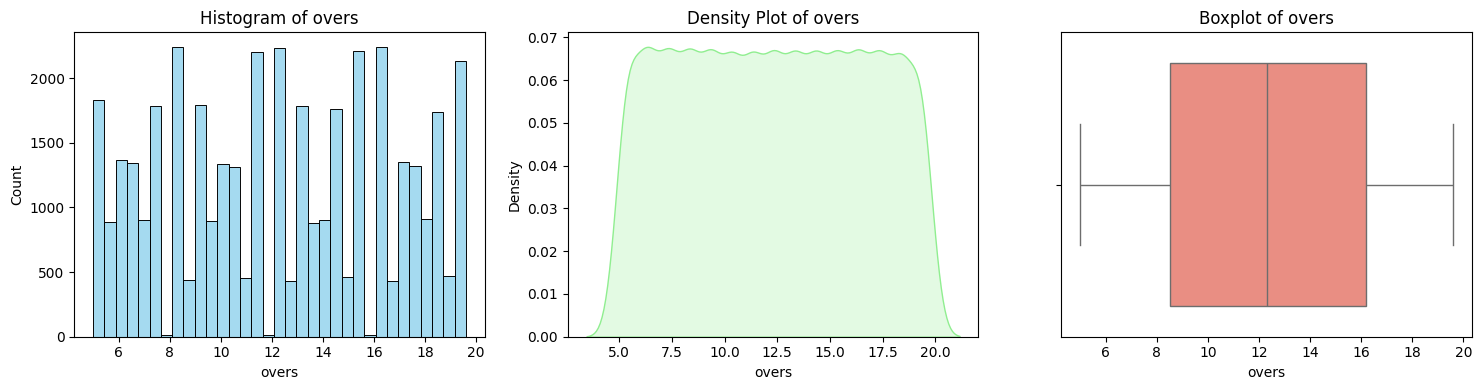

Feature: overs
count    40108.000000
mean        12.313459
std          4.323001
min          5.000000
25%          8.500000
50%         12.300000
75%         16.200000
max         19.600000
Name: overs, dtype: float64
Skewness: 0.005
Kurtosis: -1.209
------------------------------------------------------------


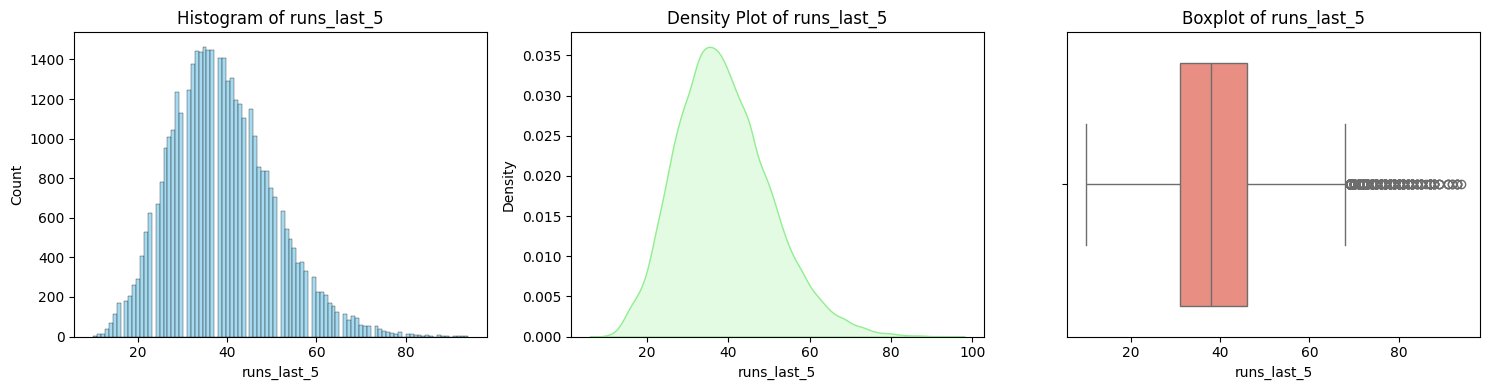

Feature: runs_last_5
count    40108.000000
mean        38.887903
std         11.503810
min         10.000000
25%         31.000000
50%         38.000000
75%         46.000000
max         94.000000
Name: runs_last_5, dtype: float64
Skewness: 0.547
Kurtosis: 0.440
------------------------------------------------------------


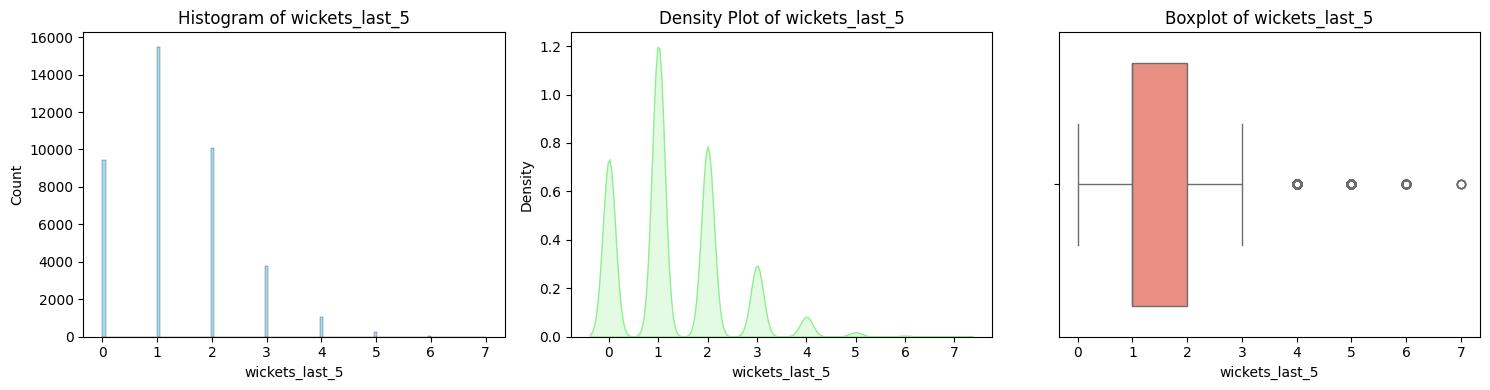

Feature: wickets_last_5
count    40108.000000
mean         1.314027
std          1.062650
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: wickets_last_5, dtype: float64
Skewness: 0.782
Kurtosis: 0.678
------------------------------------------------------------


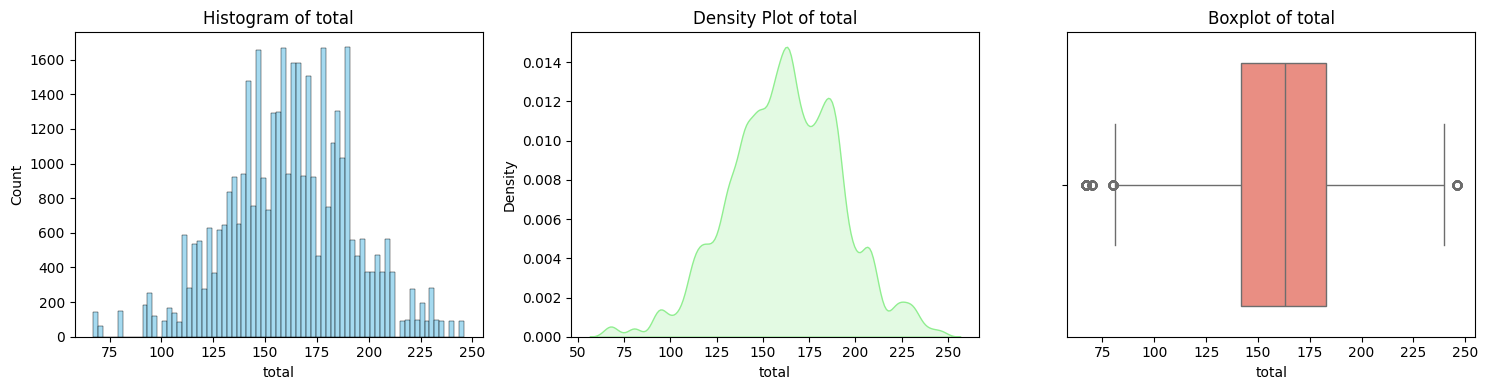

Feature: total
count    40108.000000
mean       161.947517
std         29.831496
min         67.000000
25%        142.000000
50%        163.000000
75%        183.000000
max        246.000000
Name: total, dtype: float64
Skewness: -0.095
Kurtosis: 0.145
------------------------------------------------------------


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(15,4))

    # Histogram
    plt.subplot(1,3,1)
    sns.histplot(df[col], kde=False, color='skyblue')
    plt.title(f'Histogram of {col}')

    # Density Plot
    plt.subplot(1,3,2)
    sns.kdeplot(df[col], fill=True, color='lightgreen')
    plt.title(f'Density Plot of {col}')

    # Boxplot
    plt.subplot(1,3,3)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

    # Display statistics
    print(f"Feature: {col}")
    print(df[col].describe())
    print(f"Skewness: {skew(df[col]):.3f}")
    print(f"Kurtosis: {kurtosis(df[col]):.3f}")
    print("-"*60)

/tmp/ipython-input-500210338.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='viridis', order=df[col].value_counts().index)


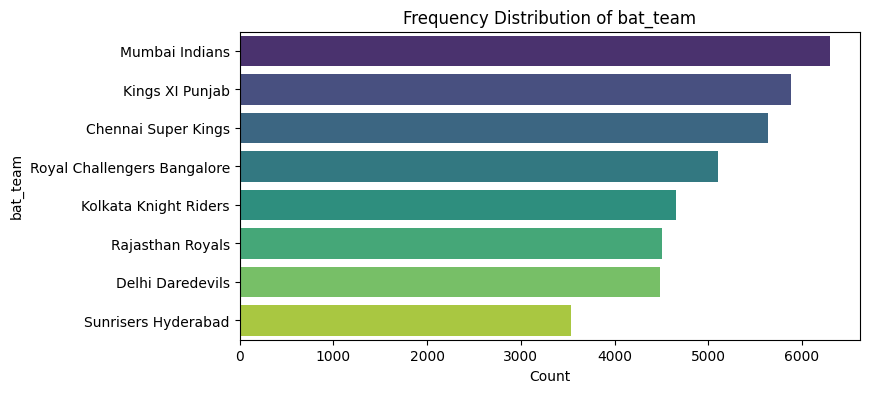

Unique values in 'bat_team': 8
bat_team
Mumbai Indians                 6300
Kings XI Punjab                5882
Chennai Super Kings            5638
Royal Challengers Bangalore    5103
Kolkata Knight Riders          4655
Rajasthan Royals               4511
Delhi Daredevils               4484
Sunrisers Hyderabad            3535
Name: count, dtype: int64
------------------------------------------------------------


/tmp/ipython-input-500210338.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='viridis', order=df[col].value_counts().index)


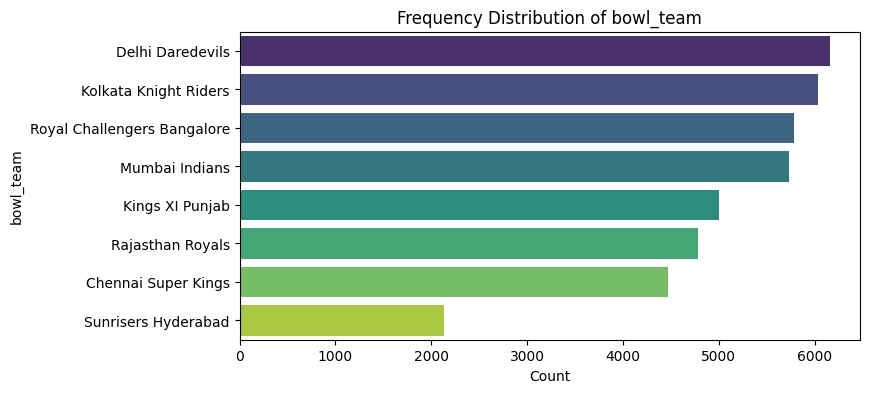

Unique values in 'bowl_team': 8
bowl_team
Delhi Daredevils               6162
Kolkata Knight Riders          6040
Royal Challengers Bangalore    5783
Mumbai Indians                 5733
Kings XI Punjab                5000
Rajasthan Royals               4787
Chennai Super Kings            4473
Sunrisers Hyderabad            2130
Name: count, dtype: int64
------------------------------------------------------------


In [65]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col], palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

    print(f"Unique values in '{col}': {df[col].nunique()}")
    print(df[col].value_counts())
    print("-"*60)


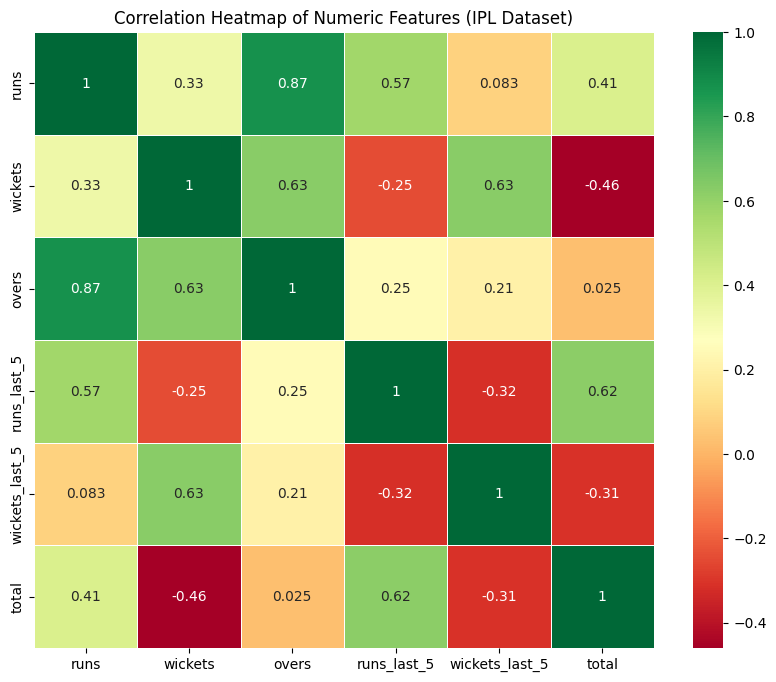

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features (IPL Dataset)")
plt.show()


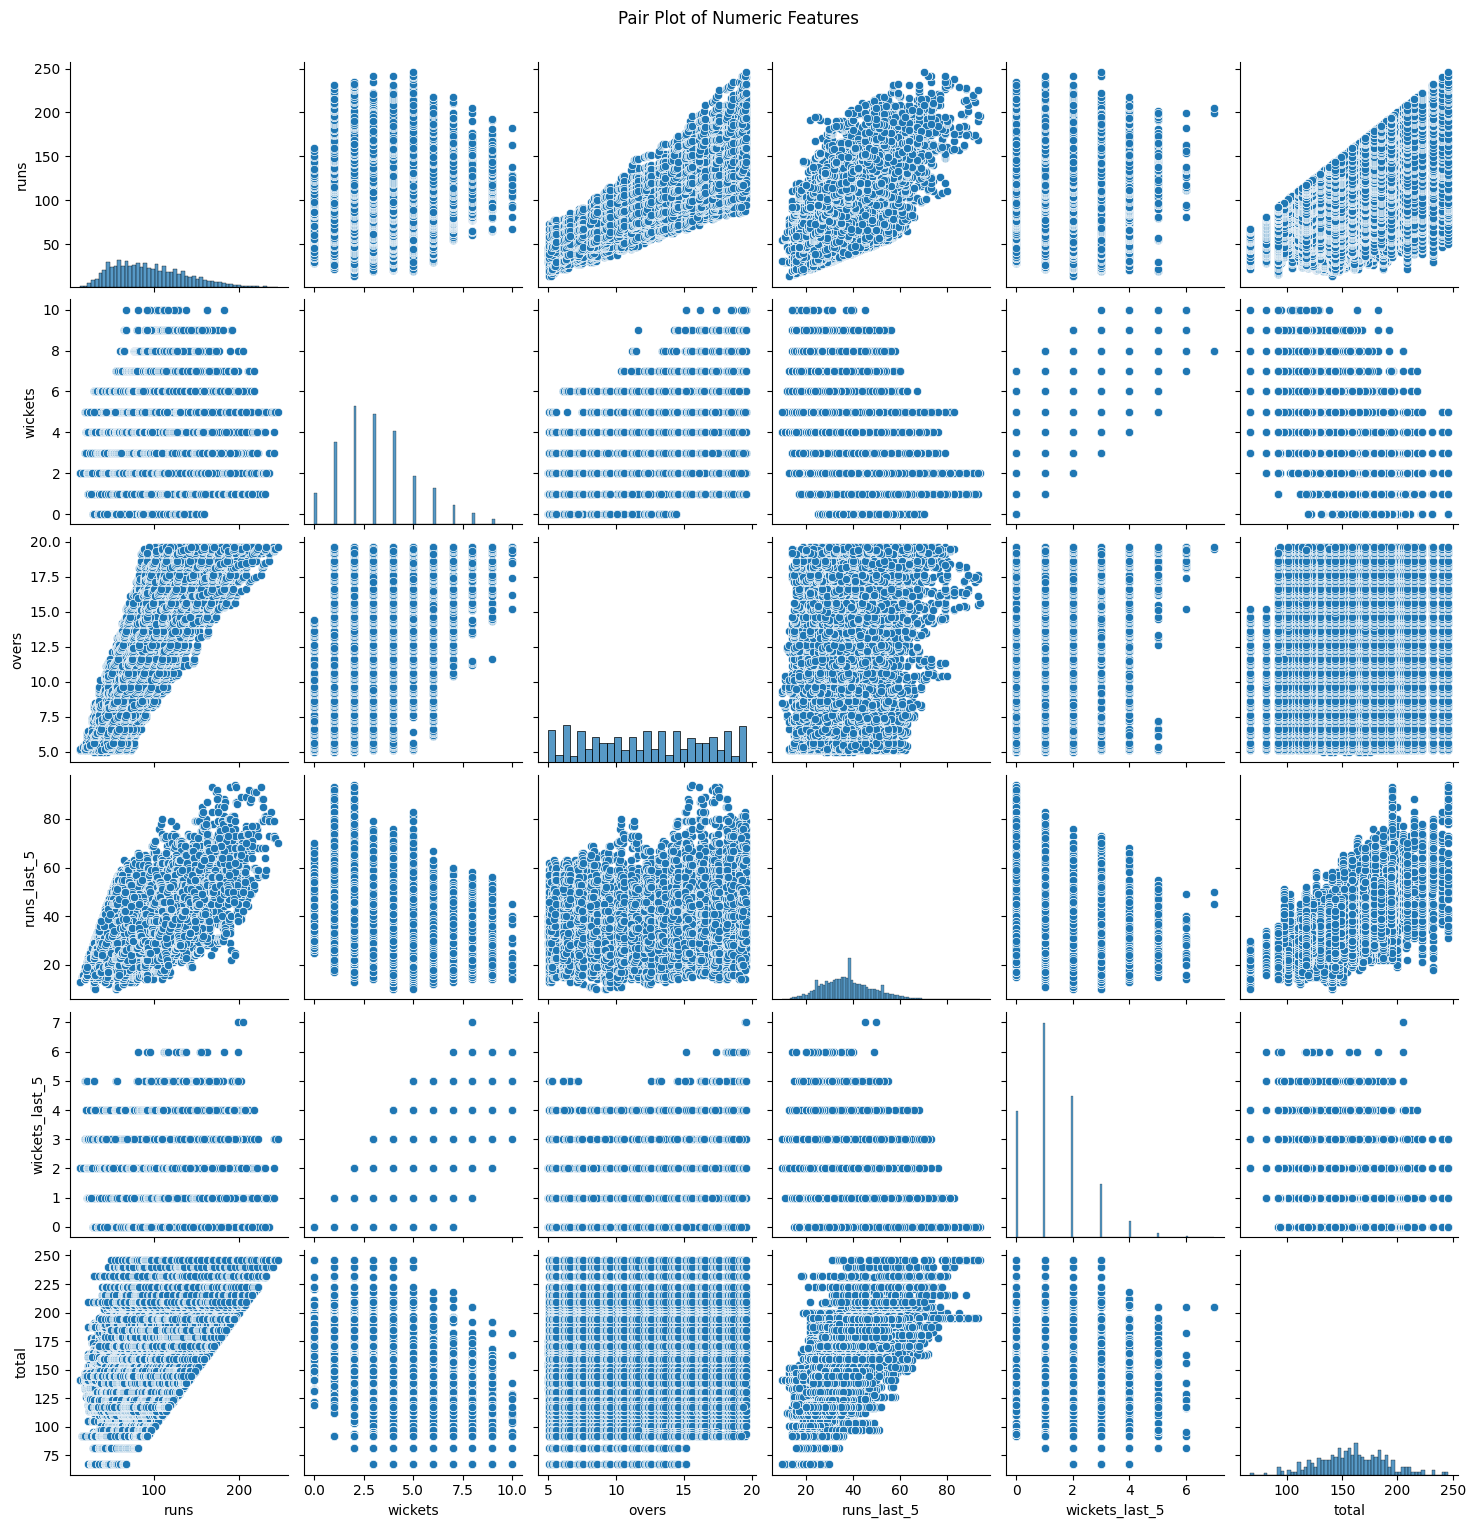

In [66]:
sns.pairplot(numeric_df)
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()

In [68]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(numeric_df))
outliers = (z_scores > 3)
print("Number of outliers per column:")
print(outliers.sum())


Number of outliers per column:
476


In [69]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))
print("Outlier counts (IQR method):")
print(outliers_iqr.sum())


Outlier counts (IQR method):
runs               60
wickets           673
overs               0
runs_last_5       298
wickets_last_5    805
total             156
dtype: int64


## **Data Preprocessing**
*• Handling categorical features*<br/>
*• Splitting dataset into train and test set on the basis of date*<br/>

In [73]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'year', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [74]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,year,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,2008,False,False,...,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,2008,False,False,...,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,2008,False,False,...,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,2008,False,False,...,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,2008,False,False,...,False,False,False,False,False,False,False,False,True,False


In [75]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [76]:
encoded_df['date'].dt.year.unique()


array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int32)

In [77]:
from sklearn.model_selection import train_test_split

X = encoded_df.drop(['date', 'total'], axis=1)
y = encoded_df['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))


Training set: (32086, 21) and Test set: (8022, 21)


## **Model Building**
I will experiment with 5 different algorithms, they are as follows:<br/>
*• Linear Regression*<br/>
*• Decision Tree Regression*<br/>
*• Random Forest Regression*<br/>

----- Boosting Algorithm -----<br/>
*• Adaptive Boosting (AdaBoost) Algorithm*<br/>

### *Linear Regression*

In [78]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [79]:
# Predicting results
y_pred_lr = linear_regressor.predict(X_test)

In [81]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.953979750170198
Mean Squared Error (MSE): 296.8783233378896
Root Mean Squared Error (RMSE): 17.23015737995128


### *Decision Tree*

In [82]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [83]:
# Predicting results
y_pred_dt = decision_regressor.predict(X_test)

In [85]:
# Decision Tree Regression - Model Evaluation
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.021628022936923
Mean Squared Error (MSE): 127.66700947394665
Root Mean Squared Error (RMSE): 11.298982674291816


### *Random Forest*

In [86]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [87]:
# Predicting results
y_pred_rf = random_regressor.predict(X_test)

In [88]:
# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.452704485284515
Mean Squared Error (MSE): 58.02623632057886
Root Mean Squared Error (RMSE): 7.617495409948001


In [91]:
import pickle

# Save the trained Random Forest model
with open("best__model.pkl", "wb") as f:
    pickle.dump(random_regressor, f)

print("✅ Random Forest model saved successfully as 'best_random_forest_ipl_model.pkl'")


✅ Random Forest model saved successfully as 'best_random_forest_ipl_model.pkl'


## **Predictions**
• Model *predicts on* data from **IPL Seasons 11 to 12** ie: (2018 to 2019)

In [92]:
import numpy as np

def predict_score(
    batting_team='Chennai Super Kings',
    bowling_team='Mumbai Indians',
    overs=5.1,
    runs=50,
    wickets=0,
    runs_in_prev_5=50,
    wickets_in_prev_5=0
):
    temp_array = []

    teams = [
        'Chennai Super Kings',
        'Delhi Daredevils',
        'Kings XI Punjab',
        'Kolkata Knight Riders',
        'Mumbai Indians',
        'Rajasthan Royals',
        'Royal Challengers Bangalore',
        'Sunrisers Hyderabad'
    ]

    # One-hot encoding for batting team
    for team in teams:
        temp_array.append(1 if batting_team == team else 0)

    # One-hot encoding for bowling team
    for team in teams:
        temp_array.append(1 if bowling_team == team else 0)

    # Adding numerical features
    temp_array.extend([overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5])

    # Convert to NumPy array
    temp_array = np.array([temp_array])

    # Predict using trained Random Forest model
    predicted_score = int(random_regressor.predict(temp_array)[0])

    return predicted_score


### **Prediction 1**
• Date: 16th April 2018<br/>
• IPL : Season 11<br/>
• Match number: 13<br/>
• Teams: Kolkata Knight Riders vs. Delhi Daredevils<br/>
• First Innings final score: 200/9


In [93]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=9.2, runs=79, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 169 to 184


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### **Prediction 2**
• Date: 7th May 2018<br/>
• IPL : Season 11<br/>
• Match number: 39<br/>
• Teams: Sunrisers Hyderabad vs. Royal Challengers Bangalore<br/>
• First Innings final score: 146/10


In [94]:
final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Royal Challengers Bangalore', overs=10.5, runs=67, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 146 to 161


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### **Prediction 3**
• Date: 17th May 2018<br/>
• IPL : Season 11<br/>
• Match number: 50<br/>
• Teams: Mumbai Indians vs. Kings XI Punjab<br/>
• First Innings final score: 186/8<br/>


In [95]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 185 to 200


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### **Prediction 4**
• Date: 30th March 2019<br/>
• IPL : Season 12<br/>
• Match number: 9<br/>
• Teams: Mumbai Indians vs. Kings XI Punjab<br/>
• First Innings final score: 176/7


In [96]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=12.3, runs=113, wickets=2, runs_in_prev_5=55, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 182 to 197


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### **Prediction 5**
• Date: 11th April 2019<br/>
• IPL : Season 12<br/>
• Match number: 25<br/>
• Teams: Rajasthan Royals vs. Chennai Super Kings<br/>
• First Innings final score: 151/7


In [97]:
final_score = predict_score(batting_team='Rajasthan Royals', bowling_team='Chennai Super Kings', overs=13.3, runs=92, wickets=5, runs_in_prev_5=27, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 127 to 142


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### **Prediction 6**
• Date: 14th April 2019<br/>
• IPL : Season 12<br/>
• Match number: 30<br/>
• Teams: Sunrisers Hyderabad vs. Delhi Daredevils<br/>
• First Innings final score: 155/7


In [98]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Sunrisers Hyderabad', overs=11.5, runs=98, wickets=3, runs_in_prev_5=41, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 164 to 179


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### **Prediction 7**
• Date: 10th May 2019<br/>
• IPL : Season 12<br/>
• Match number: 59 (Eliminator)<br/>
• Teams: Delhi Daredevils vs. Chennai Super Kings<br/>
• First Innings final score: 147/9


In [99]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Chennai Super Kings', overs=10.2, runs=68, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 139 to 154


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


*Note: In IPL, it is very difficult to predict the actual score because in a moment of time the game can completely turn upside down!*
